In [1]:
from createspectragrids import darkmatterdoubleinput
import numpy as np, os, sys
import matplotlib.pyplot as plt
from scipy import interpolate

# The below saves the absolute path to the folder containing __this__ file
modulefolderpath = ''

/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
channel_registry = {
    "eL": "eL",
    "eR": "eR",
    "e": "e",
    "muL": r"\[Mu]L",
    "muR": r"\[Mu]R",
    "mu": r"\[Mu]",
    "tauL": r"\[Tau]L",
    "tauR": r"\[Tau]R",
    "tau": r"\[Tau]",
    "q": "q",
    "c": "c",
    "b": "b",
    "t": "t",
    "WL": "WL",
    "WT": "WT",
    "W": "W",
    "ZL": "ZL",
    "ZT": "ZT",
    "Z": "Z",
    "g": "g",
    "gamma": r"\[Gamma]",
    "h": "h",
    "nu_e": r"\[Nu]e",
    "nu_mu": r"\[Nu]\[Mu]",
    "nu_tau": r"\[Nu]\[Tau]",
    "V->e": "V->e",
    "V->mu": r"V->\[Mu]",
    "V->tau": r"V->\[Tau]",
}

In [70]:
channelnames = list(channel_registry.keys())

In [39]:
channeldictionary = {}
channelfuncdictionary = {}
massvalues          = np.load(modulefolderpath+f"griddata/massvals_massenergy_diffflux_grid.npy")/1e3
log10xvals        = np.load(modulefolderpath+f"griddata/log10xvals_massenergy_diffflux_grid.npy")

for channelname in channelnames:
    tempspectragrid = np.load(modulefolderpath+f"griddata/channel={channelname}_massenergy_diffflux_grid.npy")
    channeldictionary[channelname] = tempspectragrid
    channelfuncdictionary[channelname] = interpolate.interp2d(np.log10(massvalues), log10xvals, np.array(tempspectragrid).T, 
                                kind='linear', bounds_error=False, fill_value=1e-3000)

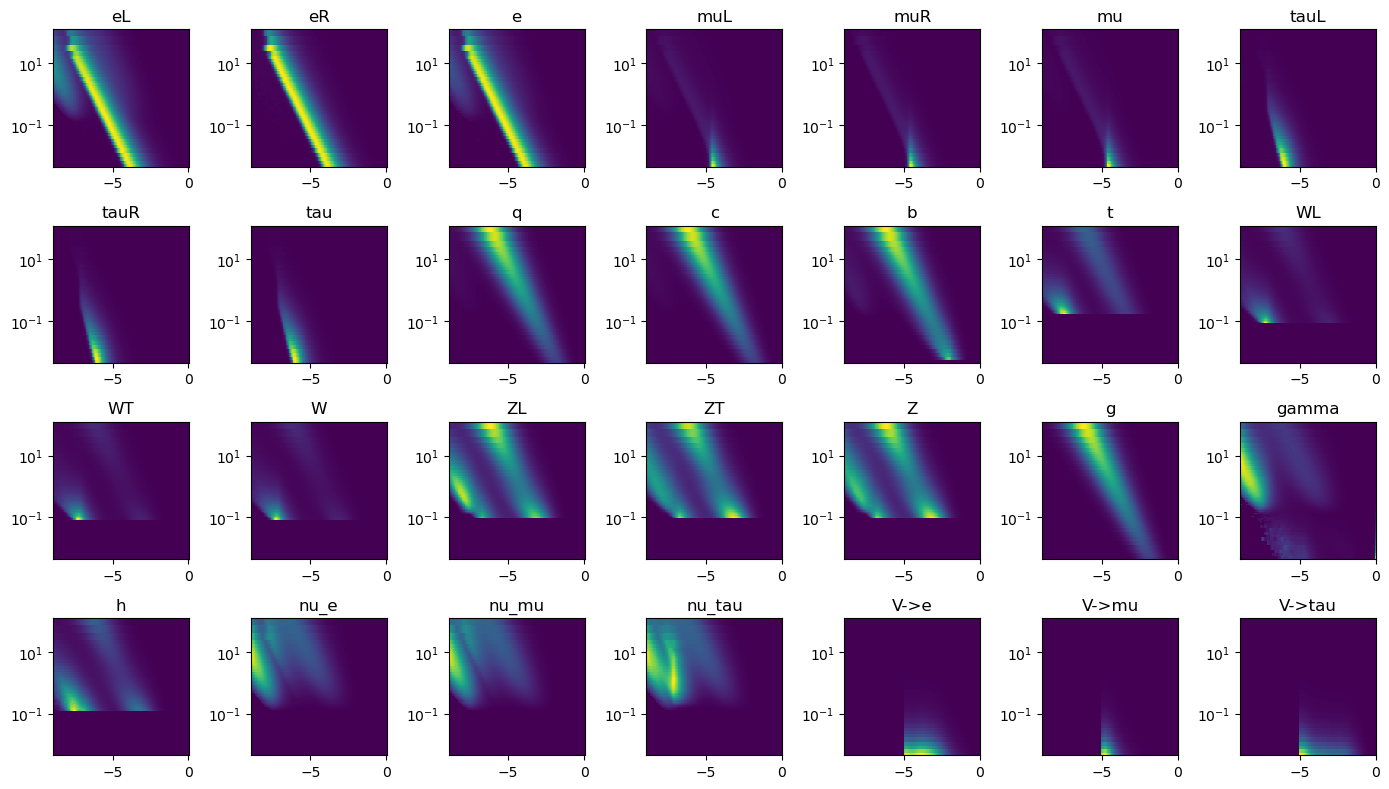

In [27]:

fig, ax = plt.subplots(4,7, figsize=(14,8))

for idx, channelarray in enumerate(channeldictionary.values()):
    ax[idx//7, idx%7].pcolormesh(log10xvals, massvalues, channelarray)
    ax[idx//7, idx%7].set_yscale('log')
    ax[idx//7, idx%7].set_title(channelnames[idx])

plt.tight_layout()
plt.show()


In [66]:
bfmlambdaarray = np.load("220913_145357/bfmlambdaarray.npy")
lambdarange = np.load("220913_145357/lambdarange.npy")
massrange = np.load("220913_145357/massrange.npy")


dataArr=bfmlambdaarray
  
Lambda = dataArr[0,:,1]
log_m_DM = np.log10(dataArr[:,0,0]/1e3)
relic = dataArr[:,:,2]
Bfw = dataArr[:,:,3]
Bfz = dataArr[:,:,4]
Bfh = dataArr[:,:,5]
Bfb = dataArr[:,:,6]
Bfc = dataArr[:,:,7]
Bfl = dataArr[:,:,8]
Bfg = dataArr[:,:,9]
Bft = dataArr[:,:,10]

# relicdensityinterped = interpolate.interp2d(Lambda,m_DM, relic)
Bfw_interp = interpolate.interp2d(Lambda,log_m_DM, Bfw)
Bfz_interp = interpolate.interp2d(Lambda,log_m_DM, Bfz)
Bfh_interp = interpolate.interp2d(Lambda, log_m_DM, Bfh)
Bfb_interp = interpolate.interp2d(Lambda, log_m_DM, Bfb)
Bfc_interp = interpolate.interp2d(Lambda, log_m_DM, Bfc)
Bfl_interp = interpolate.interp2d(Lambda, log_m_DM, Bfl)
Bfg_interp = interpolate.interp2d(Lambda, log_m_DM, Bfg)
Bft_interp = interpolate.interp2d(Lambda, log_m_DM, Bft)

bfmainchannelnames = ['W','Z','h','b','c','tau','g','t']
branchingfractionfuncs = [Bfw_interp, Bfz_interp, Bfh_interp, Bfb_interp, Bfc_interp, Bfl_interp, Bfg_interp, Bft_interp]
branchingfunctiondictionary = dict(zip(bfmainchannelnames, branchingfractionfuncs))

In [67]:
def energymassinputspectralfunc(logmass, logenergy):
    finalresult = 0
    
    for channel in bfmainchannelnames:
        branchingfraction = branchingfunctiondictionary[channel](0.1,logmass)
        singlechannelspectra = channelfuncdictionary[channel](logmass, logenergy-logmass)
        finalresult+=branchingfraction*singlechannelspectra
    
    return finalresult

    

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_66221/3715436909.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.linspace(-2,2,1001), np.log(energymassinputspectralfunc(0.0, np.linspace(-2,2,1001))))


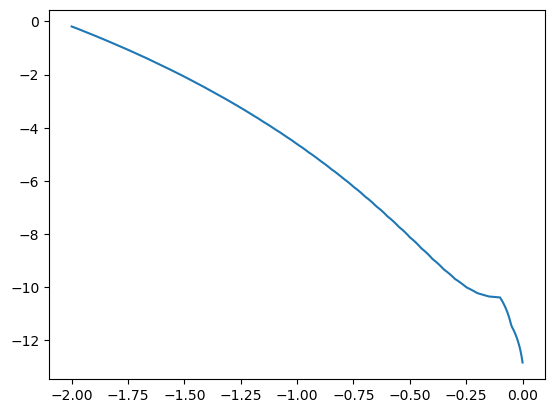

In [58]:
plt.figure()
plt.plot(np.linspace(-2,2,1001), np.log(energymassinputspectralfunc(0.0, np.linspace(-2,2,1001))))
plt.show()

In [59]:
testdict = {'name':10}

In [60]:
testdict['name']

10

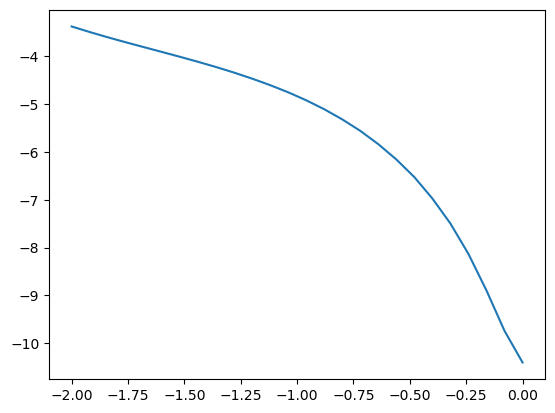

In [61]:
plt.figure()
plt.plot(np.linspace(-2,2,51), darkmatterdoubleinput(0.0, np.linspace(-2,2,51)))
plt.show()

In [68]:
%%timeit
darkmatterdoubleinput(0.0, np.logspace(-2,2,201))

/Users/lpin0002/Desktop/DMPipe/BFCalc/createspectragrids.py:108: RuntimeWarning: divide by zero encountered in log
  return np.log(twodinterpolationfunc(logmDM, logenergy-logmDM))


62.3 µs ± 428 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [69]:
%%timeit
energymassinputspectralfunc(0.0, np.logspace(-2,2,201))

399 µs ± 1.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [65]:
402e-6*1e5

40.2